In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/users/rjmay/code/research_ms/normal_plots
Updated Directory: /mnt/c/users/rjmay/code/research_ms


In [2]:
! source ../venv/bin/activate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



### Load the data

In [4]:
# from modules.multi_bounds_v3 import bounds_class
# from modules.Bhatt_knn_func import knn_num_calc
# from modules.data_gen import data_gen

In [5]:
### 3 8 or 15
d = 3


dim_str = str(d) # TODO change me 


In [6]:
file_path = 'sim_data/mean_sep' + dim_str +'.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE
    

    
# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load to deserialize and load the list of objects from the file
    loaded_objects = pickle.load(file)

print('Loaded object successfully')
    
bound_obj_lst, mean_list, exact_BER= loaded_objects

Loaded object successfully


In [7]:
exact_BER

[0.475082329934131,
 0.45026177929344596,
 0.4256343087819096,
 0.4012936823728847,
 0.37733027658303864,
 0.35383024494794424,
 0.33087438143240006,
 0.3085375533955467,
 0.2868876938344706,
 0.2659855461405653,
 0.24588384135771765,
 0.2266273711980835,
 0.20825238357930007,
 0.19078697268996014,
 0.1742507018386888,
 0.15865527409577213,
 0.1440043689584623,
 0.13029453700031662,
 0.1175152185406678,
 0.10564979269286011,
 0.09467573380175494,
 0.0845657401132045,
 0.07528797790907171,
 0.0668072174585943,
 0.05908511527013434]

### Using the data



In [8]:
dpi = 250
fs = 17

In [9]:
# lst = [obj() for obj in bound_obj_lst ]

df = pd.DataFrame([obj() for obj in bound_obj_lst], index = mean_list)

df.head()


/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
0.125,0.463845,0.494447,0.466834,0.498722,0.420429,0.493585,0.434618,0.448056,NaN,0.350373,0.477051,0.380465,0.470060
0.250,0.445096,0.490861,0.435598,0.495686,0.412471,0.492218,0.428219,0.441571,NaN,0.341158,0.474049,0.367020,0.463666
0.375,0.420488,0.484389,0.406068,0.490965,0.401275,0.490077,0.419111,0.432328,NaN,0.328124,0.469472,0.352334,0.455701
0.500,0.387021,0.472630,0.375496,0.484125,0.386284,0.486797,0.406930,0.419945,NaN,0.310766,0.462737,0.331779,0.442788
0.625,0.355939,0.457525,0.346927,0.475856,0.369893,0.482660,0.393245,0.406010,NaN,0.291650,0.454427,0.310654,0.427793


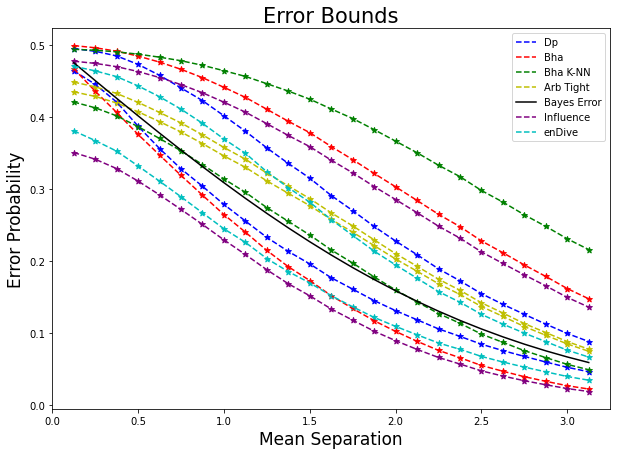

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))


# Plot Dp
ax.plot(df["Dp_lower"], 'b--', label='Dp')
ax.plot(df["Dp_upper"], 'b--')
ax.scatter(df.index, df["Dp_lower"], color='b', marker='*')
ax.scatter(df.index, df["Dp_upper"], color='b', marker='*')

# Plot Bha
ax.plot(df["Bha_lower"], 'r--', label='Bha')
ax.plot(df["Bha_upper"], 'r--')
ax.scatter(df.index, df["Bha_upper"], color='r', marker='*')
ax.scatter(df.index, df["Bha_lower"], color='r', marker='*')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')
ax.scatter(df.index, df["Bha_knn_upper"], color='g', marker='*')
ax.scatter(df.index, df["Bha_knn_lower"], color='g', marker='*')

# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'y--', label="Arb Tight")
ax.plot(df["tight_upper"], 'y--')
ax.scatter(df.index, df["tight_lower"], color='y', marker='*')
ax.scatter(df.index, df["tight_upper"], color='y', marker='*')

# Plot Bayes Error
ax.plot(mean_list,  exact_BER, 'k', label='Bayes Error')

# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')

# Plot Lower and Upper G_a
ax.plot(df["inf_lower"], 'purple', linestyle = '--', label="Influence")
ax.plot(df["inf_upper"], 'purple', linestyle = '--')
ax.scatter(df.index, df["inf_lower"], color='purple', marker='*')
ax.scatter(df.index, df["inf_upper"], color='purple', marker='*')


# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'c', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'c', ls = '--',)
ax.scatter(df.index, df["enDive_lower"], color='c', marker='*')
ax.scatter(df.index, df["enDive_upper"], color='c', marker='*')


ax.set_xlabel("Mean Separation", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
ax.legend()

ax.set_xlim([0, 3.25])

file_name = r"normal_plots/images/mean_sep" + dim_str + ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= 300)
plt.show()

Calculate true values

In [11]:
from scipy.stats import norm

dp_lst = []
bha_lst = []

#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

for i in mean_list:
    # Define the normal distributions
    f0 = norm.pdf(x, loc=i, scale =1)
    f1 = norm.pdf(x, loc=0, scale =1)

    # Calculate the minimum of f0 and f1
    min_f0_f1 = np.minimum(f0, f1)
    # Calculate BER as 0.5 * sum(min(f0, f1) * dx)
    BER = 0.5 * np.nansum(min_f0_f1 * dx)
    # print(BER)
    p = 0.5
    q = 0.5
    pf0 = p * f0
    qf1 = q * f1

    # Calculate the function
    func = (pf0 - qf1)**2 / (pf0 + qf1)

    # Calculate dp using numerical integration (sum and dx)
    dp = np.nansum(func) * dx

    # Calculate upper and lower bounds
    upper = 0.5 - 0.5 * dp
    lower = 0.5 - 0.5 * np.sqrt(dp)

    theory_Dp = [lower, upper]
    dp_lst.append(theory_Dp)

    func2 = np.sqrt(f0 * f1)
    # Calculate BC using numerical integration (sum and dx)
    BC = np.nansum(func2) * dx

    lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
    upper = 0.5 * BC
    
    theory_bha = [lower, upper] 
    bha_lst.append(theory_bha)





In [12]:
def add_noise_to_df(df, noise_level=0.01):
    """
    Add random noise to each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data to which noise will be added.
    
    Returns:
    - pandas DataFrame with noise added to each column.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_noisy = df.copy()
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Calculate the range of the data in the column
#         data_range = df[col].max() - df[col].min()
        
        # Generate random noise from a normal distribution
#         noise = np.random.normal(0, noise_level * data_range, len(df[col]))
        noise = np.random.normal(0, noise_level )
#         noise = np.random.uniform(-1 * noise_level, noise_level)
        # Add the noise to the data in the column
        df_noisy[col] = df[col] + noise
    
    return df_noisy


In [13]:
lst = []

for i in range(len(exact_BER)):
    b = exact_BER[i]
    obj = bound_obj_lst[i]
    lst.append(obj.validity(b) )



df_valid_all = pd.DataFrame(lst, index = mean_list)


In [14]:
df_noise = add_noise_to_df(df_valid_all, .008)


df_valid = df_noise[[ 'Dp', 'Bha',
       'Bha_knn', 'tight', 'inf', 'enDive']]

# df_valid.head()

In [15]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = mean_list)

# bound_width_df.head()

### Plotting

Bhattacharyya, Bha Knn, influence same theoretically

Dp, enDive

In [16]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = mean_list)

bound_width_df.head()

,Dp,Bha,Bha_knn,tight,inf,enDive
0.125,0.030602,0.031888,0.073155,0.013438,0.126677,0.089595
0.250,0.045766,0.060088,0.079748,0.013351,0.132891,0.096645
0.375,0.063901,0.084897,0.088802,0.013216,0.141348,0.103367
0.500,0.085609,0.108629,0.100513,0.013015,0.151971,0.111009
0.625,0.101586,0.128929,0.112767,0.012766,0.162777,0.117138


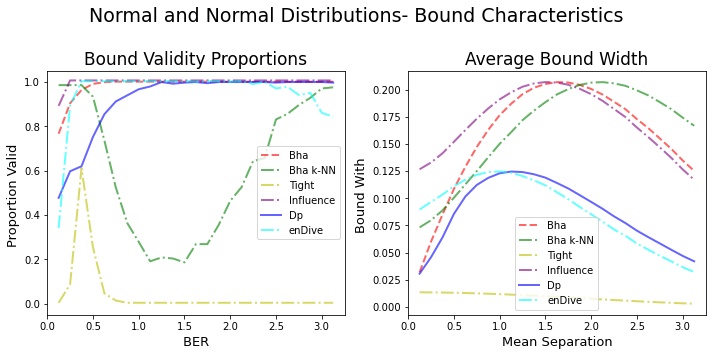

In [17]:
fs =13
overlapping = 0.6
lw = 2


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
st = fig.suptitle("Normal and Normal Distributions- Bound Characteristics", fontsize=fs+6)

ax = axes[0]
ax1 = ax




ax.plot(df_valid["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["tight"],'y',ls = "-.", label='Tight', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel(" BER ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.set_xlim(0, 3.25)
ax.legend()



ax = axes[1]

# ax.set_yscale('log', base=10)


ax.plot(bound_width_df["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(bound_width_df["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["tight"],'y',ls = "-.", label='Tight', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

ax.set_xlim(0, 3.25)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Mean Separation", fontsize = fs)
ax.set_ylabel("Bound With ", fontsize=fs)
# ax.set_ylim(0.0, 0.3)
ax.set_title("Average Bound Width" , fontsize = fs +4)
ax.legend()


fig.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the common title



file_name = r"normal_plots/images/mean_sep_bound" + dim_str +  ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()